# Final Project 3 - Introduction to Python for Data Science Program
#### **Kelompok 8**
#### Anggota Kelompok:
#### - Ervizal Buana Jatiputra (PYTN-KS10-007)
#### - Ika Nurfitriani (PYTN-KS10-008)
#### - Muhammad Reesa Rosyid (PYTN-KS10-014)

# Introduction
***
## Informasi Dataset
Data ini memiliki 13 atribut. Dimana dengan data ini akan dibuat sebuah model untuk memprediksi keselamatan pasien dari penyakit jantung.<br>

## Sumber Dataset
Dataset yang akan digunakan pada project ini berasal dari website kaggle. <br>

## Atribut Dataset
1. age - umur pasien<br>
2. anaemia - apakah ada pengurangan haemoglobin<br>
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L (Merupakan hal yang normal jika CK dalam darah dalam jumlah sedikit. Sedangkan jika jumlahnya tinggi, berarti terdapat masalah kesehatan. Tergantung pada jenis dan tingkat CK yang ditemukan, hal hal tersebut bisa menandakan adanya kerusakan atau penyakit pada otot rangka, jantung, atau otak.)<br>
4. diabetes - apakah pasien punya riwayat diabetes<br>
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung (Normalnya, nilai EF berkisar antara 50-70%. Artinya, sebanyak 50 - 70 % darah yang masuk ke dalam kamar jantung berhasil terpompa, menyisakan hanya 30 - 50% darah di dalamnya. Jika nilai EF berada di bawah 40%, ini biasanya menandakan kondisi gagal jantung.)<br>
6. high_blood_pressure - apakah pasien punya darah tinggi<br>
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL (Memang, pentingnya pengobatan gagal jantung terapeutik saat ini dalam mengurangi komplikasi stroke dan tromboemboli pada CHF masih diperdebatkan. Misalnya, tidak ada bukti percobaan acak yang mendukung penggunaan rutin agen antiplatelet pada semua pasien gagal jantung sistolik. Beberapa data bahkan menunjukkan bahwa aspirin berpotensi melemahkan efek menguntungkan dari ACE-inhibitor dan oleh karena itu, agen antitrombotik alternatif pada CHF mungkin diperlukan. Apresiasi yang lebih besar dari patofisiologi trombosit yang mendasari di CHF akan menginformasikan pengembangan agen terapi baru kami dan membantu startegi manajemen kami dalam masalah klinis yang umum dan berkembang ini.)<br>
8. serum_creatinine - level serum creatinine di darah dalam mg/dL (Hubungan Kreatinin dengan Penyakit Jantung Koroner adalah jantung menyuplai darah ke jaringan tubuh dan organ termasuk ginjal.Ginjal termasuk organ tubuh yang penting sebagai penyaring sisa metabolisme tubuh, penyeimbang elektrolit dan zat kimia, seperti natrium, kalium serta mengatur produksi urin, mengatur tekanan darah. Apabila ginjal terganggu maka akan menggangu sistem pernafasan, saraf, maupun sistem kardiovaskuler.)<br>
9. serum_sodium - level serum sodium di darah dalam mEq/L (Hiponatremia atau kadar natrium serum yang rendah biasanya didefinisikan sebagai konsentrasi natrium serum <135 mEq/L dan merupakan salah satu gangguan biokimia yang paling umum pada pasien gagal jantung, dengan prevalensi mendekati 25% (2-4). HF memengaruhi curah jantung dengan menurunkan denyut jantung atau mengurangi volume sekuncup.)<br>
10. sex - apakah pasien pria atau wanita<br>
11. smoking - apakah pasien merokok<br>
12. time - waktu dalam hari untuk follow-up<br>
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up<br>

**Keterangan :**<br>
anemia: 0 = No, 1 = Yes <br>
diabetes: 0 = No, 1 = Yes <br>
high_blood_pressure: 0 = No, 1 = Yes <br>
sex (Gender of patient): 0 = Female, 1 = Male <br>
smoking: 0 = No, 1 = Yes <br>
DEATH_EVENT: 0 = alive, 1 = death <br>

## Tujuan
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:<br>
● Mampu memahami konsep Classification dengan Ensemble Model<br>
● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model<br>
● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# A. Import Required Libraries
***
Di tahap ini, kami mengimpor beberapa library yang dibutuhkan.

In [1]:
# Untuk visualisasi
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox

# Untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter
from yellowbrick.model_selection import validation_curve
import pickle

import warnings
warnings.filterwarnings('ignore')

# B. Data Loading
***
Di tahap ini, kami akan membuat dataframe baru untuk membaca dataset.

**Open data/membaca dataset**

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
pd.set_option("display.max.columns", None)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Melihat informasi dimensi dari dataset**

In [3]:
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
299 baris
13 kolom


**Melihat ringkasan tipe data setiap kolom**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Melihat deskriptif statistik dasar untuk kolom numerik**

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### **Kesimpulan Analisis**
Berdasarkan pengecekan yang telah dilakukan, didapatkan bahwa dataset memiliki dimensi data dengan 299 baris dan 13 kolom/fitur. Kemudian terdapat 10 kolom yang bertipe numerik tepatnya integer yaitu kolom anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, serum_sodium, sex, smoking, time, dan DEATH_EVENT. Serta kolom sisanya bertipe numerik tepatnya float diantaranya kolom age, platelets dan serum_creatinine. Lalu kami juga mencoba untuk melihat informasi statistik dasar dari semua kolom yang bertipe numerik tersebut.

# C. Data Cleaning
***
Di tahap ini, kami akan mengecek duplicated data dan missing values, melihat nilai unik dari semua kolom yang ada dan mengubah nama kolom.

**Melihat 5 data pertama/teratas**

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Melihat apakah terdapat duplicated data**

In [7]:
df.duplicated().sum()

0

**Melihat apakah terdapat missing values**

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Melihat jumlah data yang unik**

In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

**Melihat semua nilai unik dari setiap kolom**

In [10]:
cols = df.columns.tolist()
for i in cols:
    print(f"Kolom {i}")
    print(df[i].unique())

Kolom age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
Kolom anaemia
[0 1]
Kolom creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   

**Pembulatan value pada age**

In [11]:
df['age'].replace([60.667], 60, inplace=True)

**Melihat nilai unik pada kolom Age**

In [12]:
df['age'].unique()

array([75., 55., 65., 50., 90., 60., 80., 62., 45., 49., 82., 87., 70.,
       48., 68., 53., 95., 58., 94., 85., 69., 72., 51., 57., 42., 41.,
       67., 79., 59., 44., 63., 86., 66., 43., 46., 61., 81., 52., 64.,
       40., 73., 77., 78., 54., 47., 56.])

**Perubahan nama pada column**

In [13]:
df.rename(columns={"anaemia":"anemia"}, inplace=True)

**Melihat 5 data pertama/teratas**

In [14]:
df.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### **Kesimpulan Analisis**
Berdasarkan tahapan yang telah dilakukan di atas, didapatkan bahwa:
1. Tidak terdapat duplicated data dan missing value. 
2. Lalu kami melihat jumlah data yang unik diantaranya pada kolom age berjumlah 47, kolom anaemia berjumlah 2, kolom creatinine_phosphokinase berjumlah 208, kolom diabetes berjumlah 2, kolom ejection_fraction berjumlah 17, kolom high_blood_pressure berjumlah 2, kolom platelets berjumlah 176, kolom serum_creatinine berjumlah 40, kolom serum_sodium berjumlah 27, kolom sex berjumlah 2, kolom smoking berjumlah 2, kolom time berjumlah 148, dan kolom DEATH_EVENT berjumlah 2. 
3. Kemudian kami melihat semua nilai unik dari setiap kolom, dan menemukan terdapat nilai tidak bulat yaitu 60.667 pada kolom Umur/age. Sehingga kami melakukan pengubahan untuk membulatkan nilai tersebut.

# D. Exploratory Data Analysis (EDA)
***
Di tahap ini, kami akan melakukan data query, grouping, serta analisis sederhana menggunakan visualisasi.

## Perbandingan feature target menggunakan plot

In [15]:
def plotTarget():
    labels = df['DEATH_EVENT'].unique().tolist()
    values = df["DEATH_EVENT"].value_counts().tolist()
    fig =  go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.show()
    fig = px.bar(df, x =labels, y = values, color = labels, text_auto=True)
    fig.update_layout(barmode = 'stack', xaxis = {'categoryorder': 'total ascending'})
    fig.show()
plotTarget()

## Visualisasi kolom numerical menggunakan Histogram

In [16]:
def numEDA():
    df_1 = df.drop(['DEATH_EVENT'], axis=1)
    num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in num_cols:
        fig = px.histogram(df, x = col, title=f'Histogram dari {col}', labels={'x': col})
        fig.update_traces(marker_color='#b1b82c')
        fig.show()
        print(f"Nilai Minimum dari {col}         = {df[col].min()}")
        print(f"Nilai Rata-Rata dari {col}       = {df[col].mean()}")
        print(f"Nilai Median dari {col}          = {df[col].median()}")
        print(f"Nilai Standar Deviasi dari {col} = {df[col].std()}")
        print(f"Nilai Variance dari {col}        = {df[col].var()}")
        print(f"Nilai Maximum dari {col}         = {df[col].max()}")
        print(f"Nilai Range dari {col}           = {df[col].max()-df[col].min()} \n\n")

numEDA()

Nilai Minimum dari age         = 40.0
Nilai Rata-Rata dari age       = 60.82943143812709
Nilai Median dari age          = 60.0
Nilai Standar Deviasi dari age = 11.894996551670072
Nilai Variance dari age        = 141.49094296424292
Nilai Maximum dari age         = 95.0
Nilai Range dari age           = 55.0 




Nilai Minimum dari anemia         = 0
Nilai Rata-Rata dari anemia       = 0.431438127090301
Nilai Median dari anemia          = 0.0
Nilai Standar Deviasi dari anemia = 0.49610726813307915
Nilai Variance dari anemia        = 0.2461224214944669
Nilai Maximum dari anemia         = 1
Nilai Range dari anemia           = 1 




Nilai Minimum dari creatinine_phosphokinase         = 23
Nilai Rata-Rata dari creatinine_phosphokinase       = 581.8394648829432
Nilai Median dari creatinine_phosphokinase          = 250.0
Nilai Standar Deviasi dari creatinine_phosphokinase = 970.2878807124363
Nilai Variance dari creatinine_phosphokinase        = 941458.5714574311
Nilai Maximum dari creatinine_phosphokinase         = 7861
Nilai Range dari creatinine_phosphokinase           = 7838 




Nilai Minimum dari diabetes         = 0
Nilai Rata-Rata dari diabetes       = 0.4180602006688963
Nilai Median dari diabetes          = 0.0
Nilai Standar Deviasi dari diabetes = 0.49406706510360887
Nilai Variance dari diabetes        = 0.2441022648200937
Nilai Maximum dari diabetes         = 1
Nilai Range dari diabetes           = 1 




Nilai Minimum dari ejection_fraction         = 14
Nilai Rata-Rata dari ejection_fraction       = 38.08361204013378
Nilai Median dari ejection_fraction          = 38.0
Nilai Standar Deviasi dari ejection_fraction = 11.834840741039173
Nilai Variance dari ejection_fraction        = 140.06345536576063
Nilai Maximum dari ejection_fraction         = 80
Nilai Range dari ejection_fraction           = 66 




Nilai Minimum dari high_blood_pressure         = 0
Nilai Rata-Rata dari high_blood_pressure       = 0.3511705685618729
Nilai Median dari high_blood_pressure          = 0.0
Nilai Standar Deviasi dari high_blood_pressure = 0.4781363790627452
Nilai Variance dari high_blood_pressure        = 0.2286143969832332
Nilai Maximum dari high_blood_pressure         = 1
Nilai Range dari high_blood_pressure           = 1 




Nilai Minimum dari platelets         = 25100.0
Nilai Rata-Rata dari platelets       = 263358.02926421416
Nilai Median dari platelets          = 262000.0
Nilai Standar Deviasi dari platelets = 97804.23686859828
Nilai Variance dari platelets        = 9565668749.44888
Nilai Maximum dari platelets         = 850000.0
Nilai Range dari platelets           = 824900.0 




Nilai Minimum dari serum_creatinine         = 0.5
Nilai Rata-Rata dari serum_creatinine       = 1.393879598662207
Nilai Median dari serum_creatinine          = 1.1
Nilai Standar Deviasi dari serum_creatinine = 1.034510064089853
Nilai Variance dari serum_creatinine        = 1.070211072703192
Nilai Maximum dari serum_creatinine         = 9.4
Nilai Range dari serum_creatinine           = 8.9 




Nilai Minimum dari serum_sodium         = 113
Nilai Rata-Rata dari serum_sodium       = 136.62541806020067
Nilai Median dari serum_sodium          = 137.0
Nilai Standar Deviasi dari serum_sodium = 4.412477283909233
Nilai Variance dari serum_sodium        = 19.469955781015
Nilai Maximum dari serum_sodium         = 148
Nilai Range dari serum_sodium           = 35 




Nilai Minimum dari sex         = 0
Nilai Rata-Rata dari sex       = 0.6488294314381271
Nilai Median dari sex          = 1.0
Nilai Standar Deviasi dari sex = 0.47813637906274487
Nilai Variance dari sex        = 0.22861439698323285
Nilai Maximum dari sex         = 1
Nilai Range dari sex           = 1 




Nilai Minimum dari smoking         = 0
Nilai Rata-Rata dari smoking       = 0.3210702341137124
Nilai Median dari smoking          = 0.0
Nilai Standar Deviasi dari smoking = 0.4676704280567721
Nilai Variance dari smoking        = 0.21871562927880447
Nilai Maximum dari smoking         = 1
Nilai Range dari smoking           = 1 




Nilai Minimum dari time         = 4
Nilai Rata-Rata dari time       = 130.2608695652174
Nilai Median dari time          = 115.0
Nilai Standar Deviasi dari time = 77.61420795029342
Nilai Variance dari time        = 6023.96527575139
Nilai Maximum dari time         = 285
Nilai Range dari time           = 281 




## Visualisasi kolom numerical menggunakan Boxplot

In [17]:
def numBotplotEDA():
    df_1 = df.drop(['DEATH_EVENT'], axis=1)
    num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in num_cols:
        fig = px.box(df, x = col, title=f'Boxplot dari {col}', labels={'x': col})
        fig.update_traces(marker_color='#a3a0a0')
        fig.show()
numBotplotEDA()

## Visualisasi pengidap diabetes berdasarkan umur menggunakan Bar Chart

In [18]:
def plotAgeDiabetes():
    df_1 = df.groupby('age')[['diabetes']].sum()
    x = df_1.index
    y = df_1['diabetes'].tolist()
    fig = go.Figure(go.Bar(x=x, y=y))
    fig.add_annotation(x=60, y=21,
            text="Umur pengidap diabetes tertinggi",
            showarrow=True,
            arrowhead=1)
    fig.update_layout(title = "Pengidap diabetes berdasarkan umur", colorway = ['#ed3737'], xaxis_title="Umur", yaxis_title = "Jumlah pengidap diabetes")
    fig.show()
    
plotAgeDiabetes()

## Visualisasi pengidap anemia berdasarkan jenis kelamin menggunakan Bar Chart

In [19]:
def plotSexAnemia():
    df_2 = df.groupby('sex')[['anemia']].sum()
    x = df_2.index
    y = df_2['anemia'].tolist()
    fig = go.Figure(go.Bar(x=x, y=y))
    fig.update_layout(title = "Pengidap anemia berdasarkan sex", colorway = ['#0D47A1'], xaxis_title="Sex", yaxis_title = "Jumlah pengidap anemia")
    fig.show()
    
plotSexAnemia()

**Visualisasi beberapa feature terhadap kematian menggunakan Bar Chart**

In [20]:
def plotDeath_status():
    kondisi1 = df['DEATH_EVENT'] == 1
    kondisi2 = df['DEATH_EVENT'] == 0
    dict_col = {
        "Anemia":df['anemia'],
        "Diabetes":df['diabetes'],
        "Blood Pressure":df['high_blood_pressure'],
        "Sex":df['sex'],
        "Smoking":df['smoking']
    }
    for key, dataframe in dict_col.items():
        layout = go.Layout(
            title= f"Perbandingan feature {key} terhadap Kematian"
        )
        fig = go.Figure(layout=layout)
        fig.add_trace(go.Bar(
            x=dataframe.unique().tolist(),
            y=dataframe[kondisi1].value_counts().tolist(),
            name='Yes',
            marker_color='red'
        ))
        fig.add_trace(go.Bar(
            x=dataframe.unique().tolist(),
            y=dataframe[kondisi2].value_counts().tolist(),
            name='No',
            marker_color='green'
        ))

        # Here we modify the tickangle of the xaxis, resulting in rotated labels.
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()
plotDeath_status()

### **Kesimpulan Analisis** 
Berdasarkan tahapan di atas, didapatkan bahwa:
1. Perbandingan antara prediksi pasien yang meninggal karena penyakit jantung ialah 67.9% tepatnya 203 yes dan 32.1% tepatnya 96 no. 
2. Lalu pada kolom numerik, kami mencari Measure of Central Tedency dan Measure of Spread yang diantaranya ialah nilai minimum, rata-rata, median, standar deviasi, variance, maximum dan range pada setiap kolom yang bertipe numerik.
3. Pada visualisasi kolom diabetes dan age, penderita diabetes tertinggi berada di umur 60 tahun sebanyak 21 orang.
4. Pada visualisasi kolom anemia dan sex, penderita anemia terbanyak berasal dari pasien dengan jenis kelamin laki-laki/Male.

# E. Data Preprocessing
***
Di tahap ini, kami akan melihat distribusi data, melihat korelasi kolom, menghapus beberapa kolom, menentukan feature dan target, dan melakukan splitting data.

**Melihat distribusi data**

In [21]:
def skewdist():
    df_1 = df.drop(['DEATH_EVENT'], axis=1)
    num_cols = df_1.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in num_cols:
        fig = px.histogram(df, x = col, title=f'Histogram dari {col}', labels={'x': col})
        fig.update_traces(marker_color='#b1b82c')
        fig.show()
        print(f"Skew of {col}: {skew(df_1[col])}")
skewdist()

Skew of age: 0.4220414746336177


Skew of anemia: 0.27686275801578286


Skew of creatinine_phosphokinase: 4.440688625555512


Skew of diabetes: 0.33225111677419733


Skew of ejection_fraction: 0.5525926588215331


Skew of high_blood_pressure: 0.6235833232384503


Skew of platelets: 1.4549745335147466


Skew of serum_creatinine: 4.433610162782361


Skew of serum_sodium: -1.04287046392733


Skew of sex: -0.6235833232384503


Skew of smoking: 0.7664787911444256


Skew of time: 0.12716059964019436


In [22]:
kolom = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']
for col in kolom:
    df[col] = boxcox(df[col])[0]
    fig = px.histogram(df, x = col, title=f'Histogram dari {col}', labels={'x': col})
    fig.update_traces(marker_color='blue')
    fig.show()
    print(f"Skew of {col}: {skew(df[col])}")

Skew of creatinine_phosphokinase: 0.04242337533198522


Skew of ejection_fraction: -0.007138298785059614


Skew of platelets: 0.1545820602074014


Skew of serum_creatinine: 0.021245590846858363


Skew of serum_sodium: 0.08194476967814122


**Melihat 5 data pertama/teratas**

In [23]:
df.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,4.011877,0,4.898018,1,935.540540,0.475058,7.639653e+13,1,0,4,1
1,55.0,0,4.790978,0,6.666743,0,932.683294,0.090952,1.046115e+14,1,0,6,1
2,65.0,0,3.447415,0,4.898018,0,734.259071,0.231062,7.239550e+13,1,1,7,1
3,50.0,1,3.320114,0,4.898018,0,834.330337,0.475058,1.100888e+14,1,0,7,1
4,65.0,1,3.488730,1,4.898018,0,1037.504702,0.632279,3.454225e+13,0,0,8,1


**Pemilihan feature dan target**

In [24]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

**Split Dataset**

In [25]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2)

**Cek korelasi setiap fitur**

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'anemia'),
  Text(0, 2.5, 'creatinine_phosphokinase'),
  Text(0, 3.5, 'diabetes'),
  Text(0, 4.5, 'ejection_fraction'),
  Text(0, 5.5, 'high_blood_pressure'),
  Text(0, 6.5, 'platelets'),
  Text(0, 7.5, 'serum_creatinine'),
  Text(0, 8.5, 'serum_sodium'),
  Text(0, 9.5, 'sex'),
  Text(0, 10.5, 'smoking'),
  Text(0, 11.5, 'time'),
  Text(0, 12.5, 'DEATH_EVENT')])

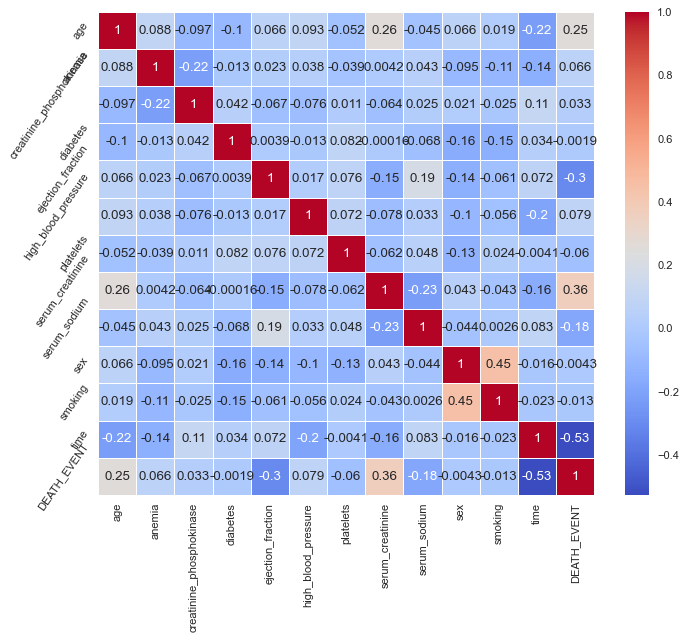

In [27]:
plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

## Feature Importance

Text(0.5, 0, 'Feature Importance')

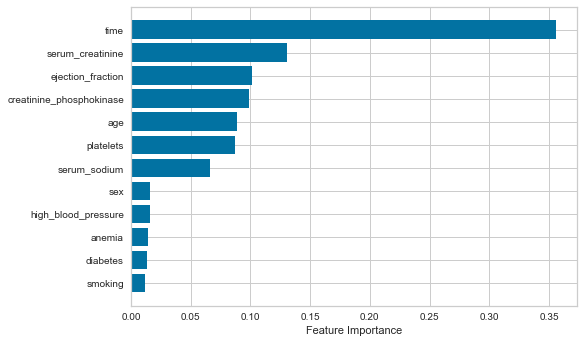

In [28]:
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

**Pemilihan feature dengan menghilangkan beberapa feature berdasarkan Feature Importance**

In [29]:
df.drop(['diabetes', 'smoking', 'sex', 'anemia', 'high_blood_pressure'], axis=1, inplace= True)
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,4.011877,4.898018,935.540540,0.475058,7.639653e+13,4,1
1,55.0,4.790978,6.666743,932.683294,0.090952,1.046115e+14,6,1
2,65.0,3.447415,4.898018,734.259071,0.231062,7.239550e+13,7,1
3,50.0,3.320114,4.898018,834.330337,0.475058,1.100888e+14,7,1
4,65.0,3.488730,4.898018,1037.504702,0.632279,3.454225e+13,8,1


**Pemilihan feature dan target**

In [30]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

**Split dataset**

In [31]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=45)

### **Kesimpulan Analisis**
Berdasarkan tahapan di atas, dapat disimpulkan bahwa:
1. Setelah mengecek korelasi dan mengecek feature importance, kami memutuskan untuk menghapus beberapa kolom diantaranya kolom diabetes, smoking, sex, anemia, high_blood_pressure.
2. Feature yang dipilih sebagai X ialah fitur/kolom age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time. Sedangkan target yang dipilih sebagai y ialah kolom DEATH_EVENT.
5. Lalu kami melakukan splitting data menjadi 80% data train dan 20% data test.

# F. Modeling
***
Di tahap ini, kami akan melakukan implementasi model dengan algoritma Random Forest, melakukan evaluasi pada model yang telah dibuat, mencoba model yang dibuat dengan data baru yang dibuat oleh kami serta menyimpan model ke file pickle.

## 1) Model Definition and Model Training

In [32]:
rf = RandomForestClassifier()
rfmodel = rf.fit(X_train, y_train)

In [33]:
y_pred = rfmodel.predict(X_test)

**Melihat skor akurasi model**

In [34]:
print("Acc: ", metrics.accuracy_score(y_test, y_pred.round()))

Acc:  0.85


## 2) Model Evaluation

**Melihat confusion matrix dengan heatmap**

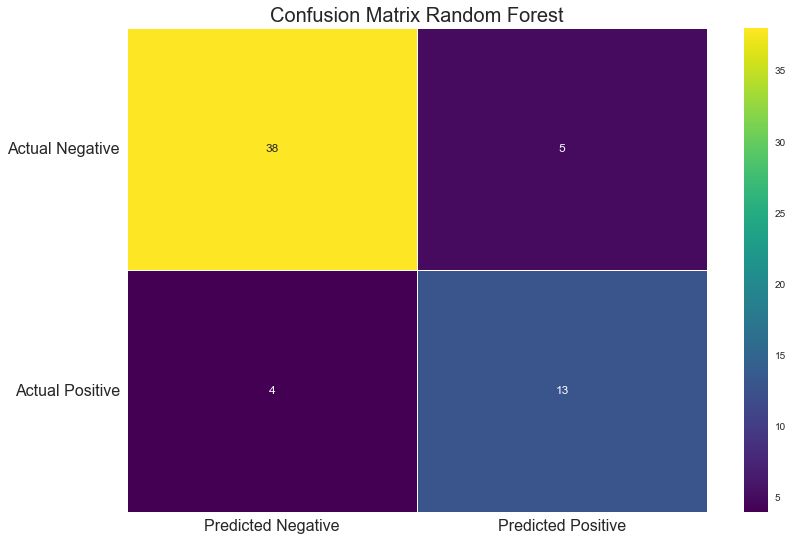

In [35]:
matrix = confusion_matrix(y_test, y_pred.round())

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matrix, annot =True, fmt = "d", linewidths = 0.5, ax=ax, cmap= "viridis")
plt.title(f"Confusion Matrix Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Negative', 'Actual Positive'], fontsize=16, rotation=360)
plt.show()

**Melihat nilai matrix**

In [36]:
tn, fp, fn, tp = matrix.ravel()
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 38
FP: 5
FN: 4
TP: 13


**Melihat classification report dari model**

In [37]:
print (metrics.classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.72      0.76      0.74        17

    accuracy                           0.85        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



## 3) Percobaan correcting imbalanced dataset

**Melihat data sebelum oversampling dan setelah oversampling**

In [38]:
print("Sebelum oversampling: ", Counter(y))
smote = SMOTE()
X_smote , y_smote = smote.fit_resample(X,y)
print("Setelah di oversampling", Counter(y_smote))

Sebelum oversampling:  Counter({0: 203, 1: 96})
Setelah di oversampling Counter({1: 203, 0: 203})


**Split dataset**

In [39]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size= 0.2)

**Pendefinisian dan training model setelah SMOTE**

In [40]:
rf_smote = RandomForestClassifier()
rfmodel_smote = rf_smote.fit(X_train_smote, y_train_smote)

In [41]:
y_pred_smote = rfmodel_smote.predict(X_test_smote)

**Melihat skor akurasi dari model setelah SMOTE**

In [42]:
print("Acc: ", metrics.accuracy_score(y_test_smote, y_pred_smote.round()))

Acc:  0.9024390243902439


****Melihat confusion matrix dengan heatmap****

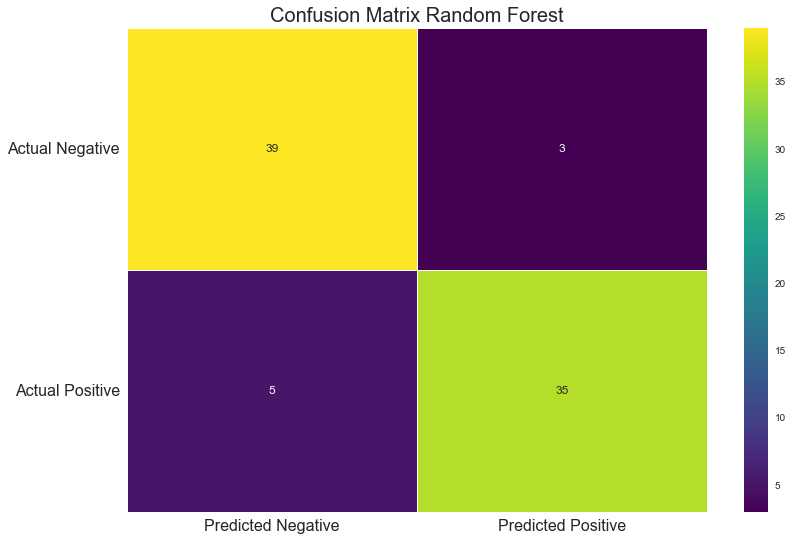

In [43]:
matrix = confusion_matrix(y_test_smote, y_pred_smote.round())

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matrix, annot =True, fmt = "d", linewidths = 0.5, ax=ax, cmap= "viridis")
plt.title(f"Confusion Matrix Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Negative', 'Predicted Positive'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Negative', 'Actual Positive'], fontsize=16, rotation=360)
plt.show()

**Melihat nilai matrix**

In [44]:
tn, fp, fn, tp = matrix.ravel()
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 39
FP: 3
FN: 5
TP: 35


**Melihat classsification report dari model setelah SMOTE**

In [45]:
print (metrics.classification_report(y_test_smote, y_pred_smote.round()))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.92      0.88      0.90        40

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



**Melihat kurva validasi dari model sebelum SMOTE**

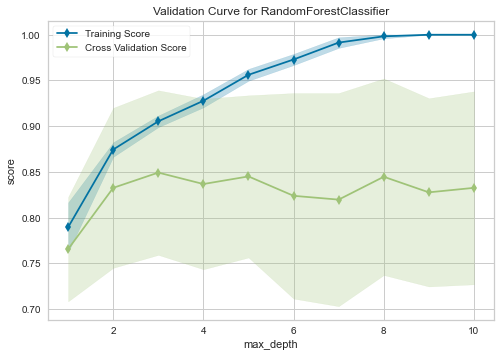

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [46]:
print(validation_curve(rfmodel, X_train, y_train, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

**Melihat kurva validasi dari model setelah SMOTE**

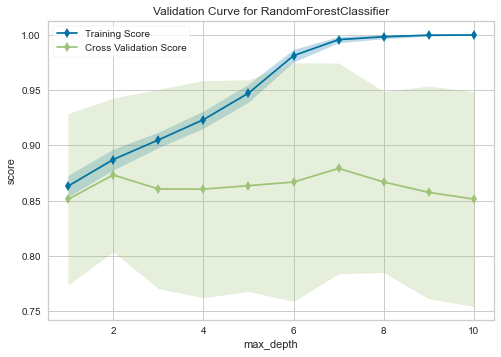

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=20, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')


In [47]:
print(validation_curve(rfmodel_smote, X_train_smote, y_train_smote, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=20, scoring="accuracy"))

## 4) Inference Model

**Melihat 5 data feature pertama/teratas**

In [48]:
X.head(100)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,4.011877,4.898018,935.540540,0.475058,7.639653e+13,4
1,55.0,4.790978,6.666743,932.683294,0.090952,1.046115e+14,6
2,65.0,3.447415,4.898018,734.259071,0.231062,7.239550e+13,7
3,50.0,3.320114,4.898018,834.330337,0.475058,1.100888e+14,7
4,65.0,3.488730,4.898018,1037.504702,0.632279,3.454225e+13,8
...,...,...,...,...,...,...,...
95,58.0,3.404718,8.153922,851.744120,0.000000,1.345272e+14,83
96,63.0,3.966059,5.474060,916.223107,0.231062,9.435357e+13,83
97,70.0,3.004648,8.153922,917.996612,0.090952,1.046115e+14,85
98,60.0,3.477366,5.474060,1023.355072,0.166815,1.100888e+14,85


In [49]:
X.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000
mean,60.829431,3.698191,6.571620,917.057785,0.109666,1.102386e+14,130.260870
std,11.894997,0.454929,0.945256,167.503572,0.317412,2.308315e+13,77.614208
min,40.000000,2.471781,4.054968,292.657424,-0.996111,2.877921e+13,4.000000
25%,51.000000,3.342934,5.974725,839.204396,-0.111051,9.435357e+13,73.000000
50%,60.000000,3.681741,6.666743,930.313284,0.090952,1.100888e+14,115.000000
75%,70.000000,4.011877,7.193238,1000.122369,0.286173,1.280198e+14,203.000000
max,95.000000,4.790978,9.202751,1659.724443,0.900269,1.885369e+14,285.000000


In [50]:
def prediction(age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time):
    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = creatinine_phosphokinase
    x[2] = ejection_fraction
    x[3] = platelets
    x[4] = serum_creatinine
    x[5] = serum_sodium
    x[6] = time
    return rfmodel_smote.predict([x])[0]

### **a. Prediksi Pertama:**<br>
Terdapat seorang pasien berumur 62 tahun dengan hasil pemeriksaan berikut ini:
- Level enzim CPK = 61 mcg/L
- Persentase darah yang keluar dari jantung setiap kontraksi (ejection fraction) = 38 %
- Jumlah platelets dalam darah = 718 kiloplatelets/mL
- Level serum creatinine = 1.3 mg/dL
- Level serum sodium = 137 mEq/L <br>

Pasien telah menjalani kontrol untuk follow up kondisi selama 270 hari. Apakah pasien ini memiliki risiko kematian akibat penyakit jantung?

In [51]:
prediction(62.0, 61, 38, 718, 1.3, 137, 270)

0

**Kesimpulan dari Prediksi Pertama:**<br>
Hasil prediksi ialah 0 yang berarti pasien ini tidak memiliki risiko kematian akibat penyakit jantung.

### **b. Prediksi Kedua:**<br>
Terdapat seorang pasien berumur 50 tahun dengan hasil pemeriksaan berikut ini:
- Level enzim CPK = 111 mcg/L
- Persentase darah yang keluar dari jantung setiap kontraksi (ejection fraction) = 20 %
- Jumlah platelets dalam darah = 945 kiloplatelets/mL
- Level serum creatinine = 1.8 mg/dL
- Level serum sodium = 139 mEq/L <br>

Pasien telah menjalani kontrol untuk follow up kondisi selama 8 hari. Apakah pasien ini memiliki risiko kematian akibat penyakit jantung?

In [52]:
prediction(50.0, 111, 20, 945, 1.8, 139, 8)

1

**Kesimpulan dari Prediksi Kedua:**<br>
Hasil prediksi ialah 1 yang berarti pasien ini memiliki risiko kematian akibat penyakit jantung.

## 5) Save model in picke file

In [53]:
with open('rf_modelsmote.pkl','wb') as f:
    pickle.dump(rfmodel_smote,f)

### **Kesimpulan Analisis**
Berdasarkan tahapan di atas, dapat disimpulkan bahwa:
1. Setelah melakukan SMOTE, model yang dibuat memiliki skor akurasi sebesar 90% dimana lebih tinggi dari model sebelum dilakukan SMOTE yang memiliki skor akurasi sebesar 85%. Sehingga kami memilih untuk menggunakan model yang telah dilakukan SMOTE dan menyimpannya dalam file pickle.
2. Kami juga melakukan inference model menggunakan data yang kami buat untuk memprediksi apakah pasien memiliki risiko kematian akibat penyakit jantung.

# G. Algorithm Analysis (Overall Analysis)
***
Berdasarkan seluruh analisis yang telah dilakukan di atas, dapat disimpulkan bahwa:
1. Dataset pada project ini memiliki dimensi data dengan 299 baris dan 13 kolom/fitur. Kemudian terdapat 10 kolom yang bertipe numerik tepatnya integer yaitu kolom anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, serum_sodium, sex, smoking, time, dan DEATH_EVENT. Serta kolom sisanya bertipe numerik tepatnya float diantaranya kolom age, platelets dan serum_creatinine. Lalu kami juga mencoba untuk melihat informasi statistik dasar dari semua kolom yang bertipe numerik tersebut. Serta tidak terdapat duplicated data dan missing value. 
3. Jumlah data yang unik diantaranya pada kolom age berjumlah 47, kolom anaemia berjumlah 2, kolom creatinine_phosphokinase berjumlah 208, kolom diabetes berjumlah 2, kolom ejection_fraction berjumlah 17, kolom high_blood_pressure berjumlah 2, kolom platelets berjumlah 176, kolom serum_creatinine berjumlah 40, kolom serum_sodium berjumlah 27, kolom sex berjumlah 2, kolom smoking berjumlah 2, kolom time berjumlah 148, dan kolom DEATH_EVENT berjumlah 2. 
4. Perbandingan antara prediksi pasien yang meninggal karena penyakit jantung ialah 67.9% tepatnya 203 yes dan 32.1% tepatnya 96 no. 
5. Pada visualisasi kolom diabetes dan age, penderita diabetes tertinggi berada di umur 60 tahun sebanyak 21 orang.
6. Pada visualisasi kolom anemia dan sex, penderita anemia terbanyak berasal dari pasien dengan jenis kelamin laki-laki/Male.
7. Setelah mengecek korelasi dan mengecek feature importance, kami memutuskan untuk menghapus beberapa kolom diantaranya kolom diabetes, smoking, sex, anemia, high_blood_pressure.
8. Feature yang dipilih sebagai X ialah fitur/kolom age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time. Sedangkan target yang dipilih sebagai y ialah kolom DEATH_EVENT. Lalu kami melakukan splitting data menjadi 80% data train dan 20% data test.
9. Setelah melakukan SMOTE, model yang dibuat memiliki skor akurasi sebesar 90% dimana lebih tinggi dari model sebelum dilakukan SMOTE yang memiliki skor akurasi sebesar 85%. Sehingga kami memilih untuk menggunakan model yang telah dilakukan SMOTE dan menyimpannya dalam file pickle.
10. Kami juga melakukan inference model menggunakan data yang kami buat untuk memprediksi apakah pasien memiliki risiko kematian akibat penyakit jantung.